# Deep Learning - Computer Vision Project Using Transfer Learning

Group Members:
- 2501987772 - Salomo Hendrian Sudjono
- 2502004102 - Musyaffa Ayman Rafif
- 2501987463 - Favian Harya Nandana Adrian

Transfer learning: pre-trained model

- Resnet (Residual Networks)
- VGG (Visual Geometry Group)

In [34]:
print('tes')

tes


In [3]:
!pip install sklearn
!pip install tensorflow
!pip install matplotlib
!pip install keras
!pip install numpy

  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post5-py3-none-any.whl size=2950 sha256=0abb8e0cf6ee6086c7fe9b747509f758bebb1ccdbd6b4dfa0f1404dd8d2af8e4
  Stored in directory: /home/jupyter/.cache/pip/wheels/38/1f/8d/4f812c590e074c1e928f5cec67bf5053b71f38e2648739403a
Successfully built sklearn
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 1.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 115.3 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 86.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 4.0 MB/s eta 0:00:000:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.9/22.9 MB 14.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from PIL import Image
import time

In [ ]:
import numpy as np
import math
import scipy.misc
import os
# from keras.applications import
from matplotlib.pyplot import imshow
from keras.applications import vgg16,ResNet50
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from keras.applications.imagenet_utils import decode_predictions

from sklearn.metrics import precision_score,recall_score,f1_score
from keras.applications.vgg16 import VGG16

from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Dropout

from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.utils import plot_model
from IPython.display import Image

In [ ]:
from keras.applications import Xception

In [ ]:
# train_dir = '/content/drive/MyDrive/DLFP/ed_data_51/train'
# # val_dir =  '/content/drive/MyDrive/DLFP/ed_data_51/val'
# test_dir = '/content/drive/MyDrive/DLFP/ed_data_51/test'

train_dir = 'train'
test_dir =  'test'

## Dataset & Description

Data source: https://www.kaggle.com/datasets/ananthu017/emotion-detection-fer?resource=download

The dataset contain 35,685 examples of 48x48 pixel gray scale images of faces divided into train and test dataset. Images are categorized based on the emotion shown in the facial expressions (happiness, neutral, sadness, anger, surprise, disgust, fear).

In our project, we reduced the number of samples in each set to 101 images per class for the training set and 51 images per class for the test set.



In [27]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   validation_split = 0.2,
                                   rotation_range=20,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [28]:
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=128,
    class_mode='categorical')

Found 28709 images belonging to 7 classes.


In [29]:
val_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=128,
    class_mode='categorical')

Found 28709 images belonging to 7 classes.


In [30]:
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=128,
    class_mode='categorical')

Found 7178 images belonging to 7 classes.


(48, 48)
(1, 48, 48)


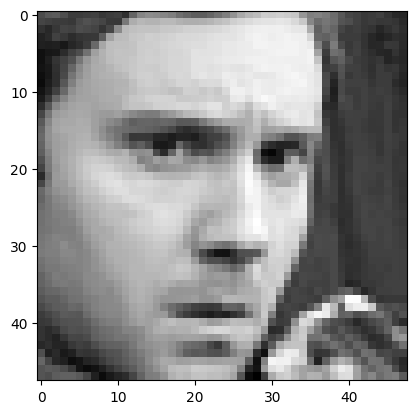

In [ ]:
img = Image.open("/content/drive/MyDrive/DLFP/ed_data_51/train/angry/im0.png")
img = np.array(img)
plt.imshow(img, cmap='gray')
print(img.shape)

img = np.expand_dims(img, axis=0)
from keras.models import load_model
print(img.shape)

# ResNet50

In [10]:
resnet_base_model = ResNet50(weights='imagenet', include_top = False, input_shape=(224, 224, 3))

# Every layer tidak akan meload weight yang sudah ada // Freeze layers
for layer in resnet_base_model.layers:
  layer.trainable = False

resnet_model = Sequential()
resnet_model.add(resnet_base_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation ='relu'))
resnet_model.add(Dense(7, activation = 'softmax'))

2023-06-15 06:52:15.020002: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-15 06:52:15.033622: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-15 06:52:15.035265: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-15 06:52:15.037345: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild

In [11]:
resnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 512)               51380736  
                                                                 
 dense_1 (Dense)             (None, 7)                 3591      
                                                                 
Total params: 74,972,039
Trainable params: 51,384,327
Non-trainable params: 23,587,712
_________________________________________________________________


In [12]:
start_time = time.time()
history_resnet = resnet_model.fit(train_data, epochs=5, validation_data=val_data)
print("--- %s seconds ---" % (time.time() - start_time))

Epoch 1/5


2023-06-15 06:52:37.194909: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8200
2023-06-15 06:52:41.144587: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x55c48b470e00 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-06-15 06:52:41.144627: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
2023-06-15 06:52:41.151819: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-06-15 06:52:41.297496: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


225/225 [==============================] - 621s 3s/step - loss: 3.5645 - accuracy: 0.2159 - val_loss: 2.0334 - val_accuracy: 0.2627
Epoch 2/5
225/225 [==============================] - 612s 3s/step - loss: 1.9230 - accuracy: 0.2428 - val_loss: 2.0032 - val_accuracy: 0.2293
Epoch 3/5
225/225 [==============================] - 616s 3s/step - loss: 1.8363 - accuracy: 0.2658 - val_loss: 1.8404 - val_accuracy: 0.2036
Epoch 4/5
225/225 [==============================] - 605s 3s/step - loss: 1.8117 - accuracy: 0.2674 - val_loss: 1.7935 - val_accuracy: 0.2544
Epoch 5/5
225/225 [==============================] - 611s 3s/step - loss: 1.7611 - accuracy: 0.2827 - val_loss: 1.7575 - val_accuracy: 0.2759
--- 3066.146126270294 seconds ---


In [13]:
# Evaluate the model on the test data
loss, accuracy = resnet_model.evaluate(test_data)

# Make predictions on the test data
predictions = resnet_model.predict(test_data)
predictions = np.argmax(predictions,axis=1)
true_labels = test_data.classes
# Calculate precision, recall, and f1 scores
precision = precision_score(true_labels, predictions,average='macro')
recall = recall_score(true_labels, predictions,average='macro')
f1 = f1_score(true_labels, predictions,average='macro')

# Print the metrics
print('Accuracy: {:.2f}%'.format(accuracy * 100))
print('Precision: {:.2f}'.format(precision))
print('Recall: {:.2f}'.format(recall))
print('F1 score: {:.2f}'.format(f1))

57/57 [==============================] - 24s 417ms/step
Accuracy: 28.09%
Precision: 0.14
Recall: 0.14
F1 score: 0.08


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


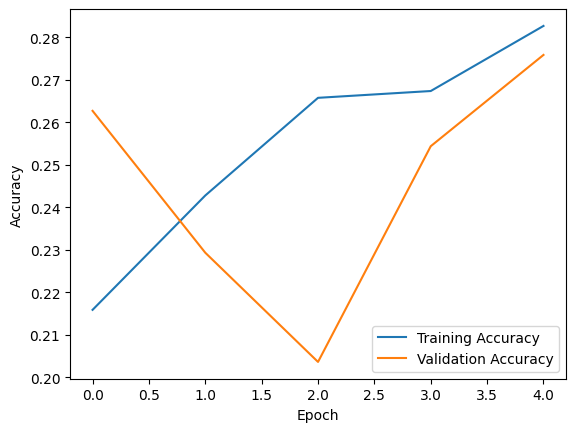

In [14]:
plt.plot(history_resnet.history['accuracy'], label='Training Accuracy')
plt.plot(history_resnet.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

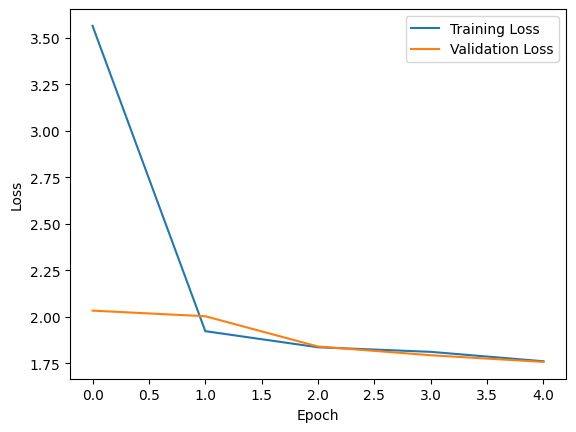

In [15]:
plt.plot(history_resnet.history['loss'], label='Training Loss')
plt.plot(history_resnet.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

In [82]:
!pip install graphviz

In [84]:
from keras.utils.vis_utils import plot_model
plot_model(resnet_model,to_file='model_plot.png' ,show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


Eksplanasi dari model:

The architecture of this model is a transfer learning model that uses the ResNet50 model as the base model, followed by a few new layers. The ResNet50 model is pretrained on the ImageNet dataset, which contains millions of images with thousands of classes. The ResNet50 model is a deep CNN with 50 layers and is designed to learn features from images.

The ResNet_model starts with the ResNet50 model as the first layer, with its weights frozen to prevent further training. The Flatten layer is added after the ResNet50 model to flatten the output from the ResNet50 model into a 1D vector that can be fed into the new layers.

The next layer is a fully connected Dense layer with 512 neurons and the ReLU activation function, which helps to learn more complex and non-linear relationships in the data. Finally, a Dense layer with 7 neurons and a softmax activation function is added as the output layer to classify the input images into one of seven classes.

Overall, this model leverages the powerful feature extraction capabilities of the ResNet50 model and adds a few new layers on top to adapt to a specific classification task.

# Xception

In [31]:
xception_base_model = Xception(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

# Every layer tidak akan meload weight yang sudah ada // Freeze layers
for layer in xception_base_model.layers:
  layer.trainable = False

xception_model = Sequential()
xception_model.add(xception_base_model)
xception_model.add(Flatten())
xception_model.add(Dense(512, activation ='relu'))
xception_model.add(Dense(7, activation = 'softmax'))

In [32]:
xception_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
xception_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 flatten_2 (Flatten)         (None, 100352)            0         
                                                                 
 dense_4 (Dense)             (None, 512)               51380736  
                                                                 
 dense_5 (Dense)             (None, 7)                 3591      
                                                                 
Total params: 72,245,807
Trainable params: 51,384,327
Non-trainable params: 20,861,480
_________________________________________________________________


In [ ]:
start_time = time.time()
history_xception = xception_model.fit(train_data, epochs=5, validation_data=val_data)
print("--- %s seconds ---" % (time.time() - start_time))

Epoch 1/5
225/225 [==============================] - 638s 3s/step - loss: 3.1627 - accuracy: 0.3478 - val_loss: 1.5440 - val_accuracy: 0.3992
Epoch 2/5
225/225 [==============================] - 619s 3s/step - loss: 1.5183 - accuracy: 0.4178 - val_loss: 1.4893 - val_accuracy: 0.4252
Epoch 3/5
225/225 [==============================] - 629s 3s/step - loss: 1.4856 - accuracy: 0.4297 - val_loss: 1.4396 - val_accuracy: 0.4517
Epoch 4/5
225/225 [==============================] - 629s 3s/step - loss: 1.4540 - accuracy: 0.4434 - val_loss: 1.4458 - val_accuracy: 0.4473
Epoch 5/5
225/225 [==============================] - ETA: 0s - loss: 1.4440 - accuracy: 0.4468

In [35]:
# Evaluate the model on the test data
loss, accuracy = xception_model.evaluate(test_data)

# Make predictions on the test data
predictions = xception_model.predict(test_data)
predictions = np.argmax(predictions,axis=1)
true_labels = test_data.classes
# Calculate precision, recall, and f1 scores
precision = precision_score(true_labels, predictions,average='macro')
recall = recall_score(true_labels, predictions,average='macro')
f1 = f1_score(true_labels, predictions,average='macro')

# Print the metrics
print('Accuracy: {:.2f}%'.format(accuracy * 100))
print('Precision: {:.2f}'.format(precision))
print('Recall: {:.2f}'.format(recall))
print('F1 score: {:.2f}'.format(f1))

57/57 [==============================] - 33s 581ms/step
Accuracy: 47.72%
Precision: 0.15
Recall: 0.15
F1 score: 0.14


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


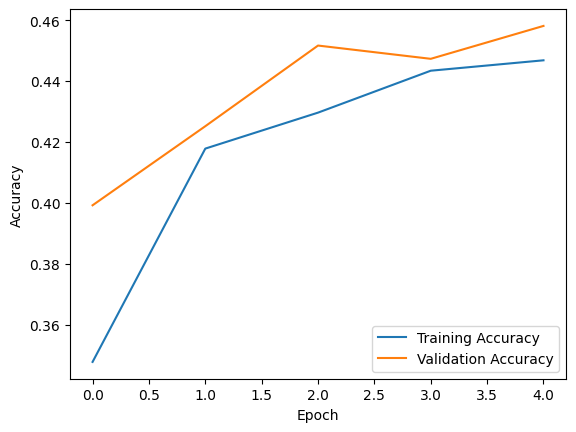

In [36]:
plt.plot(history_xception.history['accuracy'], label='Training Accuracy')
plt.plot(history_xception.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

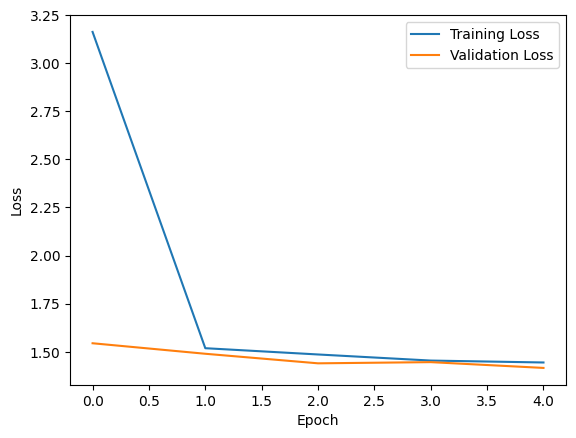

In [37]:
plt.plot(history_xception.history['loss'], label='Training Loss')
plt.plot(history_xception.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

# VGG

In [38]:
  # Load the pre-trained VGG16 model without the top layer
vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3)) #include top -> tidak menggunakan layer terakhir
num_classes = 7

# Freeze the weights of the pre-trained VGG16 layers
for layer in vgg16_base.layers:
    layer.trainable = False

# Add a custom top layer for our specific task
from keras.layers import Conv2D, MaxPooling2D

vgg_model = Sequential()
vgg_model.add(vgg16_base)
vgg_model.add(Flatten())
vgg_model.add(Dense(512, activation ='relu'))
vgg_model.add(Dense(num_classes, activation = 'softmax'))

In [39]:
vgg_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
vgg_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 25088)             0         
                                                                 
 dense_6 (Dense)             (None, 512)               12845568  
                                                                 
 dense_7 (Dense)             (None, 7)                 3591      
                                                                 
Total params: 27,563,847
Trainable params: 12,849,159
Non-trainable params: 14,714,688
_________________________________________________________________


In [40]:
start_time = time.time()
history_vgg = vgg_model.fit(train_data, epochs=5, validation_data=val_data)
print("--- %s seconds ---" % (time.time() - start_time))

Epoch 1/5
225/225 [==============================] - 650s 3s/step - loss: 1.8519 - accuracy: 0.3615 - val_loss: 1.5050 - val_accuracy: 0.4195
Epoch 2/5
225/225 [==============================] - 621s 3s/step - loss: 1.4578 - accuracy: 0.4421 - val_loss: 1.4083 - val_accuracy: 0.4611
Epoch 3/5
225/225 [==============================] - 591s 3s/step - loss: 1.4065 - accuracy: 0.4674 - val_loss: 1.3917 - val_accuracy: 0.4706
Epoch 4/5
225/225 [==============================] - 583s 3s/step - loss: 1.3756 - accuracy: 0.4769 - val_loss: 1.3781 - val_accuracy: 0.4734
Epoch 5/5
225/225 [==============================] - 587s 3s/step - loss: 1.3560 - accuracy: 0.4823 - val_loss: 1.3122 - val_accuracy: 0.5039
--- 3032.7805302143097 seconds ---


In [41]:
loss, accuracy = vgg_model.evaluate(test_data)

# Make predictions on the test data
predictions = vgg_model.predict(test_data)
predictions = np.argmax(predictions,axis=1)
true_labels = test_data.classes
# Calculate precision, recall, and f1 scores
precision = precision_score(true_labels, predictions,average='macro')
recall = recall_score(true_labels, predictions,average='macro')
f1 = f1_score(true_labels, predictions,average='macro')

# Print the metrics
print('Accuracy: {:.2f}%'.format(accuracy * 100))
print('Precision: {:.2f}'.format(precision))
print('Recall: {:.2f}'.format(recall))
print('F1 score: {:.2f}'.format(f1))

57/57 [==============================] - 30s 533ms/step
Accuracy: 49.53%
Precision: 0.15
Recall: 0.15
F1 score: 0.14


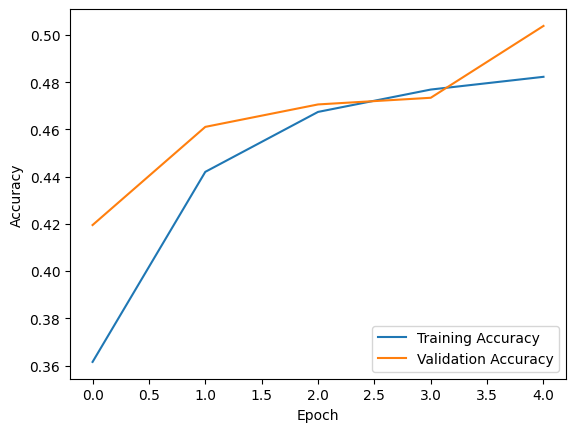

In [42]:
plt.plot(history_vgg.history['accuracy'], label='Training Accuracy')
plt.plot(history_vgg.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

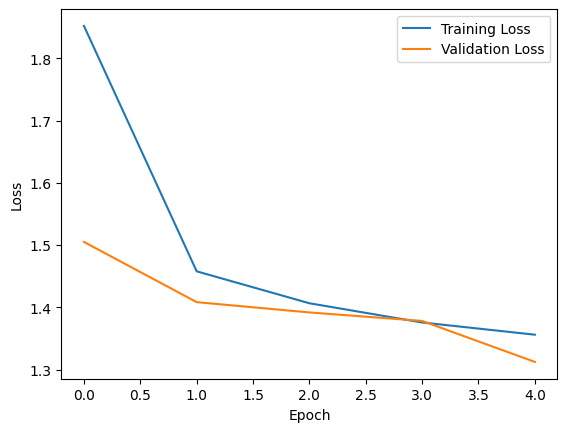

In [43]:
plt.plot(history_vgg.history['loss'], label='Training Loss')
plt.plot(history_vgg.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

This is a transfer learning model that uses the VGG16 model as the base model, with the last layer (top layer) removed. The VGG16 model is pretrained on the ImageNet dataset, which contains millions of images with thousands of classes. The model consists of 16 layers, including convolutional and pooling layers, and is designed to learn features from images.

The model starts with the VGG16 model as the first layer, with its weights frozen to prevent further training. The next layer is a Dropout layer, which randomly drops out a fraction of the input units during training to prevent overfitting. The Flatten layer is added after the Dropout layer to flatten the output from the VGG16 model into a 1D vector that can be fed into the new layers.

The next layer is a fully connected Dense layer with 128 neurons and the ReLU activation function, which helps to learn more complex and non-linear relationships in the data. Another Dropout layer is added after this layer to further prevent overfitting. Finally, a Dense layer with 'num_classes' neurons (7 in this case) and a softmax activation function is added as the output layer to classify the input images into one of seven classes.

Overall, this model leverages the powerful feature extraction capabilities of the VGG16 model and adds a few new layers on top to adapt to a specific classification task.

# Concatenate Model

In [44]:
from tensorflow.keras.layers import Concatenate,GlobalAveragePooling2D

# resnet_model = GlobalAveragePooling2D()(resnet_base_model.output)
# vgg_model = Flatten()(vgg16_base.output)

input_xception = xception_model.input
input_vgg = vgg_model.input
input_resnet = resnet_model.input

output_xception = xception_model.layers[-2].output
output_vgg = vgg_model.layers[-2].output
output_resnet = resnet_model.layers[-2].output

In [45]:
def concat_generators(train_data, val_data):
    while True:
        batch1, labels1 = next(train_data)
        batch2, labels2 = next(val_data)
        yield np.concatenate([batch1, batch2]), np.concatenate([labels1, labels2])

# Get the batches of data from the generator
X1, y = next(concat_generators(train_data, val_data))
X2, y = next(concat_generators(train_data, val_data))

## VGG + ResNet50

In [46]:
merged_resnet_vgg = Concatenate()([output_resnet, output_vgg])

resnet_vgg = Dense(num_classes, activation='softmax')(merged_resnet_vgg)

concat_resnet_vgg = Model(inputs=[input_resnet, input_vgg], outputs=resnet_vgg)

In [47]:
concat_resnet_vgg.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [48]:
concat_resnet_vgg.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 resnet50_input (InputLayer)    [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 vgg16_input (InputLayer)       [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 resnet50 (Functional)          (None, 7, 7, 2048)   23587712    ['resnet50_input[0][0]']         
                                                                                              

In [49]:
start_time = time.time()
concat_resnet_vgg_history = concat_resnet_vgg.fit((X1,X2),y,epochs=5,validation_data=((X1,X2),y))
print("--- %s seconds ---" % (time.time() - start_time))

Epoch 1/5
8/8 [==============================] - 16s 703ms/step - loss: 2.6311 - accuracy: 0.2148 - val_loss: 1.8511 - val_accuracy: 0.2695
Epoch 2/5
8/8 [==============================] - 4s 527ms/step - loss: 1.8089 - accuracy: 0.3203 - val_loss: 1.6318 - val_accuracy: 0.3633
Epoch 3/5
8/8 [==============================] - 4s 534ms/step - loss: 1.6178 - accuracy: 0.3359 - val_loss: 1.4677 - val_accuracy: 0.4570
Epoch 4/5
8/8 [==============================] - 4s 541ms/step - loss: 1.4868 - accuracy: 0.5195 - val_loss: 1.3739 - val_accuracy: 0.5117
Epoch 5/5
8/8 [==============================] - 4s 546ms/step - loss: 1.3536 - accuracy: 0.4727 - val_loss: 1.2393 - val_accuracy: 0.6406
--- 32.46687722206116 seconds ---


In [50]:
# Evaluate the model on the test data
loss, accuracy = concat_resnet_vgg.evaluate((X1,X2),y)

# Make predictions on the test data
predictions = concat_resnet_vgg.predict([X1,X2])

y_pred_classes = np.argmax(predictions, axis=1)

# Convert true labels from one-hot encoding to class labels
y_true_classes = np.argmax(y, axis=1)

# Print the performance metrics
# print(classification_report(y_true_classes, y_pred_classes))
precision = precision_score(y_true_classes, y_pred_classes,average='macro')
recall = recall_score(y_true_classes, y_pred_classes,average='macro')
f1 = f1_score(y_true_classes, y_pred_classes,average='macro')
print('Precision: {:.2f}'.format(precision))
print('Recall: {:.2f}'.format(recall))
print('F1 score: {:.2f}'.format(f1))

8/8 [==============================] - 2s 229ms/step
Precision: 0.63
Recall: 0.52
F1 score: 0.47


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


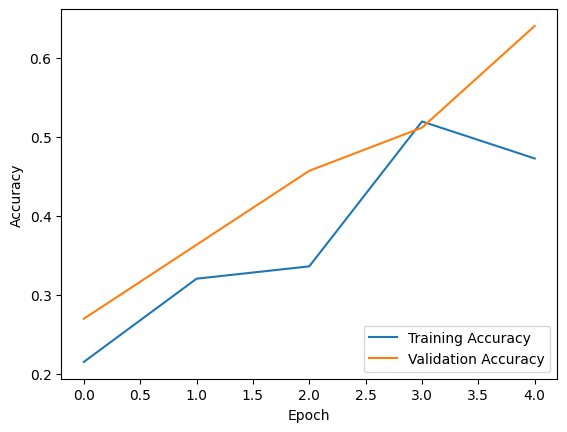

In [51]:
plt.plot(concat_resnet_vgg_history.history['accuracy'], label='Training Accuracy')
plt.plot(concat_resnet_vgg_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

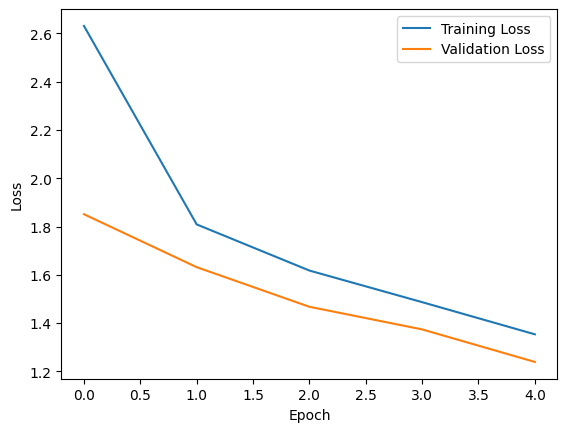

In [52]:
plt.plot(concat_resnet_vgg_history.history['loss'], label='Training Loss')
plt.plot(concat_resnet_vgg_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

## VGG + Xception

In [53]:
merged_xception_vgg = Concatenate()([output_xception, output_vgg])

xception_vgg = Dense(num_classes, activation='softmax')(merged_xception_vgg)

concat_xception_vgg = Model(inputs=[input_xception, input_vgg], outputs=xception_vgg)

In [54]:
concat_xception_vgg.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [55]:
concat_xception_vgg.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 xception_input (InputLayer)    [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 vgg16_input (InputLayer)       [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 xception (Functional)          (None, 7, 7, 2048)   20861480    ['xception_input[0][0]']         
                                                                                            

In [56]:
start_time = time.time()
concat_model_history = concat_xception_vgg.fit((X1,X2),y,epochs=5,validation_data=((X1,X2),y))
print("--- %s seconds ---" % (time.time() - start_time))

Epoch 1/5
8/8 [==============================] - 10s 772ms/step - loss: 2.3906 - accuracy: 0.1719 - val_loss: 1.7852 - val_accuracy: 0.2578
Epoch 2/5
8/8 [==============================] - 5s 631ms/step - loss: 1.5929 - accuracy: 0.3516 - val_loss: 1.4178 - val_accuracy: 0.4688
Epoch 3/5
8/8 [==============================] - 5s 640ms/step - loss: 1.3640 - accuracy: 0.4727 - val_loss: 1.1931 - val_accuracy: 0.5391
Epoch 4/5
8/8 [==============================] - 5s 645ms/step - loss: 1.1428 - accuracy: 0.5586 - val_loss: 0.9905 - val_accuracy: 0.6914
Epoch 5/5
8/8 [==============================] - 5s 641ms/step - loss: 0.9745 - accuracy: 0.6602 - val_loss: 0.8161 - val_accuracy: 0.8047
--- 29.847404956817627 seconds ---


In [ ]:
# Evaluate the model on the test data
loss, accuracy = concat_xception_vgg.evaluate((X1,X2),y)

# Make predictions on the test data
predictions = concat_xception_vgg.predict([X1,X2])

y_pred_classes = np.argmax(predictions, axis=1)

# Convert true labels from one-hot encoding to class labels
y_true_classes = np.argmax(y, axis=1)

# Print the performance metrics
# print(classification_report(y_true_classes, y_pred_classes))
precision = precision_score(y_true_classes, y_pred_classes,average='macro')
recall = recall_score(y_true_classes, y_pred_classes,average='macro')
f1 = f1_score(y_true_classes, y_pred_classes,average='macro')
print('Precision: {:.2f}'.format(precision))
print('Recall: {:.2f}'.format(recall))
print('F1 score: {:.2f}'.format(f1))

In [ ]:
plt.plot(concat_model_history.history['accuracy'], label='Training Accuracy')
plt.plot(concat_model_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
plt.plot(concat_model_history.history['loss'], label='Training Loss')
plt.plot(concat_model_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()